## In this notebook we will implement Policy Iteration (Policy evaluation <-> Policy improvement) and Value Iteration

- Frozen Lake 8x8 env will be used
- We will need the entire MDP of the env

In [1]:
import gym
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

np.random.seed(0)

In [2]:
env = gym.make("FrozenLake8x8-v0")

In [3]:
env.action_space, env.env.nA

(Discrete(4), 4)

In [4]:
env.observation_space, env.env.nS

(Discrete(64), 64)

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

"8x8": [
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHFFHFHF",
        "FFFHFFFG"
    ]

- accessing the transition prob, Prob[s/a] = env.P[s][s'] -> list to tuples where tuple (P[s'/s], s', r, done)

In [5]:
env.P[0][0]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 8, 0.0, False)]

### Assume that we will start with random determinsitic policy

In [6]:
# create initial policy
nS, nA = env.env.nS, env.env.nA
pi = {s: np.random.choice(env.action_space.n) for s in range(env.env.nS)}

_Iterative evaluation of state value under a policy_
- For stochastic policy policy under evaluation
$$ V_{k+1}(s) = \sum_{a} \pi(a/s) \sum_{s',r}p(s',r/s,a) [r + \gamma V_{k}(s')]$$ 
- For deterministic policy policy under evaluation
$$ V_{k+1}(s) = \sum_{s',r}p(s',r/s,a) [r + \gamma V_{k}(s')]$$ 

- Here we have a deterministic policy to begin with

In [7]:
def policy_evaluation(pi, max_iters, tol, nA, mdp, gamma=0.9):
    '''
    [1] pi: policy dict mapping state to action (state is the key and action is the value)
    [2] max_iters: max num of iterations to perform for policy eval
    [3] tol: to check if state value function changes by less than tol, then exit policy evaluation
    [4] nA: number actions in every state
    [5] mdp: MDP
    [6] gamma: Discount factor
    '''  
    num_states = len(pi)
    v_old = np.zeros(num_states)
    for i in range(max_iters):
        v = np.zeros(nS)        
        for s in range(num_states): # loop through all states
            for prob, next_state, r, done in mdp[s][pi[s]]:
                bootstrap_val = v_old[next_state]
                v[s] += prob*(r + gamma * bootstrap_val * (not done)) # NOTE: we are doing synchronous updates
                
        # Exit criteria: check for change in value function
        if np.amax(np.abs(v - v_old)) <= tol:
            print(f"tolerance achieve.. exiting early")
            break
        print(f"Iteration.. :{i}/{max_iters}, {np.amax(np.abs(v - v_old))}")
        v_old = v.copy() 
    return v

In [10]:
# check the policy_evaluation function
pi = {s: np.random.choice(env.action_space.n) for s in range(env.env.nS)} # random policy
mdp = env.env.P
v = policy_evaluation(pi, max_iters=1000, tol=1e-9, nA=nA, mdp=mdp, gamma=1.0)

Iteration.. :0/1000, 0.3333333333333333
Iteration.. :1/1000, 0.1111111111111111
Iteration.. :2/1000, 0.07407407407407407
Iteration.. :3/1000, 0.06172839506172839
Iteration.. :4/1000, 0.04938271604938271
Iteration.. :5/1000, 0.041152263374485576
Iteration.. :6/1000, 0.034750800182899
Iteration.. :7/1000, 0.030025910684346846
Iteration.. :8/1000, 0.027180815932530605
Iteration.. :9/1000, 0.02499618960524308
Iteration.. :10/1000, 0.02307123462435151
Iteration.. :11/1000, 0.02126294358169578
Iteration.. :12/1000, 0.01964971966157425
Iteration.. :13/1000, 0.018155459506427885
Iteration.. :14/1000, 0.01681145469825679
Iteration.. :15/1000, 0.015573474225830053
Iteration.. :16/1000, 0.014453396655539297
Iteration.. :17/1000, 0.013423848628718205
Iteration.. :18/1000, 0.012488100493828036
Iteration.. :19/1000, 0.011628354763882631
Iteration.. :20/1000, 0.01084401040755184
Iteration.. :21/1000, 0.010246463822648683
Iteration.. :22/1000, 0.009850304881929894
Iteration.. :23/1000, 0.0094653497623

Iteration.. :215/1000, 1.0807629524767215e-05
Iteration.. :216/1000, 1.0427699891901732e-05
Iteration.. :217/1000, 1.0061156555662976e-05
Iteration.. :218/1000, 9.707526606228534e-06
Iteration.. :219/1000, 9.366353893203172e-06
Iteration.. :220/1000, 9.037198429207027e-06
Iteration.. :221/1000, 8.719635815446214e-06
Iteration.. :222/1000, 8.413256686934378e-06
Iteration.. :223/1000, 8.11766617875298e-06
Iteration.. :224/1000, 7.832483409853097e-06
Iteration.. :225/1000, 7.557340986563688e-06
Iteration.. :226/1000, 7.291884523141778e-06
Iteration.. :227/1000, 7.03577217964213e-06
Iteration.. :228/1000, 6.788674216273716e-06
Iteration.. :229/1000, 6.550272563465853e-06
Iteration.. :230/1000, 6.320260407643996e-06
Iteration.. :231/1000, 6.098341791105355e-06
Iteration.. :232/1000, 5.884231227160086e-06
Iteration.. :233/1000, 5.677653328262089e-06
Iteration.. :234/1000, 5.478342447018392e-06
Iteration.. :235/1000, 5.286042331187346e-06
Iteration.. :236/1000, 5.100505790278653e-06
Iteration

Iteration.. :447/1000, 2.8172659760627994e-09
Iteration.. :448/1000, 2.7191596752018654e-09
Iteration.. :449/1000, 2.62447119592224e-09
Iteration.. :450/1000, 2.533081411293381e-09
Iteration.. :451/1000, 2.4448754132322392e-09
Iteration.. :452/1000, 2.3597421239252014e-09
Iteration.. :453/1000, 2.2775745178726936e-09
Iteration.. :454/1000, 2.198269177799972e-09
Iteration.. :455/1000, 2.121726405679425e-09
Iteration.. :456/1000, 2.0478498896636665e-09
Iteration.. :457/1000, 1.9765466485743843e-09
Iteration.. :458/1000, 1.9077271429246423e-09
Iteration.. :459/1000, 1.8413047753185197e-09
Iteration.. :460/1000, 1.7771959459622622e-09
Iteration.. :461/1000, 1.715320052664282e-09
Iteration.. :462/1000, 1.6555993243017042e-09
Iteration.. :463/1000, 1.5979585987757616e-09
Iteration.. :464/1000, 1.5423254895452487e-09
Iteration.. :465/1000, 1.4886299415373117e-09
Iteration.. :466/1000, 1.4368045087032044e-09
Iteration.. :467/1000, 1.3867840209513815e-09
Iteration.. :468/1000, 1.338505528636346

In [11]:
v

array([0.0173096 , 0.02001383, 0.02271806, 0.09734612, 0.17197418,
       0.29050415, 0.32299053, 0.37114079, 0.01460538, 0.01569165,
       0.02542229, 0.0409228 , 0.12807227, 0.25801778, 0.35547691,
       0.41929105, 0.01081487, 0.01245576, 0.01262602, 0.        ,
       0.08527623, 0.22248105, 0.32414915, 0.46744132, 0.00917398,
       0.01086075, 0.01095251, 0.01476672, 0.03334765, 0.        ,
       0.39448949, 0.51559159, 0.00584633, 0.00544184, 0.00546478,
       0.        , 0.05547133, 0.13306635, 0.34372772, 0.63669369,
       0.00292316, 0.        , 0.        , 0.01989128, 0.05304341,
       0.08376762, 0.        , 0.75779579, 0.        , 0.        ,
       0.00265217, 0.00663043, 0.        , 0.11823651, 0.        ,
       0.8788979 , 0.        , 0.        , 0.00132609, 0.        ,
       0.        , 0.27094191, 0.4236473 , 0.        ])

### Policy Improvement

- Use state value function and one step look ahead using MDP
$$ \pi(s) = argmax_{a}\sum_{s',r}p(s',r/s,a) [r + \gamma V_{k}(s')]$$

In [12]:
def policy_improvement(v, mdp, gamma=1.0):
    '''
    [1] mdp: MDP
    [2] v: state value function
    [3] gamma: discout factor
    '''
    num_states = len(v)
    qval = np.zeros((num_states, nA))
    
    for s in range(num_states): # for every state        
        for action, values in mdp[s].items():
            for prob, next_state, reward, done in values:
                qval[s, action] += prob * (reward + gamma * v[next_state] * (not done))
    # update policy
    pi = {s: a for s, a in enumerate(np.argmax(qval, axis=1))}
        
    return pi, qval


In [13]:
pi_new, qval = policy_improvement(v, mdp, gamma=0.9)

In [14]:
def print_policy(pi, P, action_symbols=('<', 'v', '>', '^'), n_cols=8, title='Policy:'):
    print(title)
    arrs = {k:v for k,v in enumerate(action_symbols)}
    for s in range(len(P)):
        a = pi[s]
        print("| ", end="")
        if np.all([done for action in P[s].values() for _, _, _, done in action]):
            print("".rjust(9), end=" ")
        else:
            print(str(s).zfill(2), arrs[a].rjust(6), end=" ")
        if (s + 1) % n_cols == 0: print("|")

In [15]:
print_policy(pi, mdp, title='Policy:')

Policy:
| 00      v | 01      ^ | 02      < | 03      ^ | 04      v | 05      > | 06      < | 07      v |
| 08      > | 09      < | 10      > | 11      < | 12      v | 13      ^ | 14      > | 15      > |
| 16      v | 17      < | 18      ^ |           | 20      v | 21      ^ | 22      < | 23      > |
| 24      > | 25      ^ | 26      > | 27      ^ | 28      ^ |           | 30      > | 31      v |
| 32      > | 33      > | 34      ^ |           | 36      ^ | 37      ^ | 38      > | 39      > |
| 40      ^ |           |           | 43      > | 44      ^ | 45      > |           | 47      > |
| 48      v |           | 50      > | 51      > |           | 53      < |           | 55      > |
| 56      ^ | 57      < | 58      < |           | 60      < | 61      > | 62      ^ |           |


In [16]:
print_policy(pi_new, mdp, title='Policy:')

Policy:
| 00      ^ | 01      ^ | 02      > | 03      > | 04      > | 05      > | 06      > | 07      > |
| 08      ^ | 09      ^ | 10      ^ | 11      ^ | 12      > | 13      > | 14      > | 15      > |
| 16      ^ | 17      > | 18      < |           | 20      > | 21      ^ | 22      > | 23      > |
| 24      ^ | 25      ^ | 26      ^ | 27      v | 28      < |           | 30      > | 31      > |
| 32      ^ | 33      ^ | 34      < |           | 36      > | 37      v | 38      ^ | 39      > |
| 40      < |           |           | 43      v | 44      ^ | 45      < |           | 47      > |
| 48      < |           | 50      v | 51      < |           | 53      < |           | 55      > |
| 56      < | 57      v | 58      < |           | 60      v | 61      > | 62      v |           |


In [17]:
pi == pi_new

False

### Policy Iteration
- This is just policy evaluation and policy improvement in loop until convergence

In [18]:
def policy_iteration(pi, mdp, gamma=1.0, max_iters=100, tol=1e-9, maxcount=100):
    '''
    [1] pi: initial policy
    [2] gamma: discount factor
    [3] max_iters: maximum iterations for policy evaluation
    [4] tol: min tolerance for state value function change for policy eval exit  criterion
    [5] mdp
    [6] maxcount: counter for  policy iteration to exit
    '''
    
    counter = 0
    while True:
        counter +=1
        pi_old = pi
        # run policy evaluation (this is called prediction problem)
        v = policy_evaluation(pi, max_iters, tol, nA, mdp, gamma=1.0)
        # run policy improvement (this is called control problem)
        pi_new, _ = policy_improvement(v, mdp, gamma=1.0)
        if pi_new == pi_old:
            print(f"No change in policy after policy improvement.. exiting in {counter} steps")
            break
        elif counter >= maxcount:
            print(f"Reached maximum count limit of {counter} steps for policy iteration, exiting...")
            break
        
        pi = pi_new
            
    return pi_new, v

In [19]:
pi = {s: np.random.choice(env.action_space.n) for s in range(env.env.nS)} # random policy
pi_new, v_final = policy_iteration(pi, mdp, gamma=1.0, max_iters=1000, tol=1e-9, maxcount=100)

Iteration.. :0/1000, 0.3333333333333333
Iteration.. :1/1000, 0.1111111111111111
Iteration.. :2/1000, 0.07407407407407407
Iteration.. :3/1000, 0.04938271604938271
Iteration.. :4/1000, 0.03292181069958844
Iteration.. :5/1000, 0.021947873799725626
Iteration.. :6/1000, 0.014631915866483824
Iteration.. :7/1000, 0.009754610577655864
Iteration.. :8/1000, 0.00650307371843728
Iteration.. :9/1000, 0.00433538247895815
Iteration.. :10/1000, 0.002890254985972174
Iteration.. :11/1000, 0.0019268366573147455
Iteration.. :12/1000, 0.0012845577715432377
Iteration.. :13/1000, 0.0008563718476954918
Iteration.. :14/1000, 0.0005709145651303094
Iteration.. :15/1000, 0.0003806097100869099
Iteration.. :16/1000, 0.0002537398067246066
Iteration.. :17/1000, 0.00016915987114973774
Iteration.. :18/1000, 0.00011277324743313999
Iteration.. :19/1000, 7.518216495538965e-05
Iteration.. :20/1000, 5.012144330363011e-05
Iteration.. :21/1000, 3.34142955357164e-05
Iteration.. :22/1000, 2.2276197023884947e-05
Iteration.. :23/

Iteration.. :84/1000, 0.005357066958489254
Iteration.. :85/1000, 0.005279084056715511
Iteration.. :86/1000, 0.005202229556201088
Iteration.. :87/1000, 0.005126487995217088
Iteration.. :88/1000, 0.005051844012876949
Iteration.. :89/1000, 0.004978282363505948
Iteration.. :90/1000, 0.004905787928786709
Iteration.. :91/1000, 0.004834345727967149
Iteration.. :92/1000, 0.0047639409263834365
Iteration.. :93/1000, 0.004694558842518459
Iteration.. :94/1000, 0.004626184953788526
Iteration.. :95/1000, 0.0045588049012244
Iteration.. :96/1000, 0.004492404493192881
Iteration.. :97/1000, 0.004426969708287709
Iteration.. :98/1000, 0.004362486697499612
Iteration.. :99/1000, 0.0042989417857624
Iteration.. :100/1000, 0.004236321472959936
Iteration.. :101/1000, 0.004174612434468372
Iteration.. :102/1000, 0.004113801521295701
Iteration.. :103/1000, 0.004053875759877146
Iteration.. :104/1000, 0.003994822351573002
Iteration.. :105/1000, 0.003936628671912357
Iteration.. :106/1000, 0.003879282269620643
Iterati

Iteration.. :295/1000, 0.00024219832662275564
Iteration.. :296/1000, 0.00023866991693299866
Iteration.. :297/1000, 0.0002351929100544714
Iteration.. :298/1000, 0.00023176655713774696
Iteration.. :299/1000, 0.00022839012024233885
Iteration.. :300/1000, 0.00022506287217827214
Iteration.. :301/1000, 0.00022178409634976415
Iteration.. :302/1000, 0.0002185530866002372
Iteration.. :303/1000, 0.00021536914706077326
Iteration.. :304/1000, 0.00021223159199990071
Iteration.. :305/1000, 0.00020913974567637883
Iteration.. :306/1000, 0.0002060929421932034
Iteration.. :307/1000, 0.0002030905253539439
Iteration.. :308/1000, 0.0002001318485225223
Iteration.. :309/1000, 0.00019721627448254786
Iteration.. :310/1000, 0.00019434317530142575
Iteration.. :311/1000, 0.0001915119321937997
Iteration.. :312/1000, 0.0001887219353895464
Iteration.. :313/1000, 0.00018597258400121497
Iteration.. :314/1000, 0.00018326328589568508
Iteration.. :315/1000, 0.00018059345756626932
Iteration.. :316/1000, 0.0001779625240064

Iteration.. :560/1000, 4.956843731362959e-06
Iteration.. :561/1000, 4.88463111258941e-06
Iteration.. :562/1000, 4.813470506404016e-06
Iteration.. :563/1000, 4.74334658662201e-06
Iteration.. :564/1000, 4.6742442511016336e-06
Iteration.. :565/1000, 4.606148616637107e-06
Iteration.. :566/1000, 4.539045017626364e-06
Iteration.. :567/1000, 4.472919001519138e-06
Iteration.. :568/1000, 4.407756327040602e-06
Iteration.. :569/1000, 4.343542959417412e-06
Iteration.. :570/1000, 4.2802650694895306e-06
Iteration.. :571/1000, 4.217909028714217e-06
Iteration.. :572/1000, 4.1564614072786554e-06
Iteration.. :573/1000, 4.095908971102347e-06
Iteration.. :574/1000, 4.0362386790615545e-06
Iteration.. :575/1000, 3.977437679547613e-06
Iteration.. :576/1000, 3.919493308690569e-06
Iteration.. :577/1000, 3.862393086917493e-06
Iteration.. :578/1000, 3.806124716398962e-06
Iteration.. :579/1000, 3.7506760783845294e-06
Iteration.. :580/1000, 3.696035230871253e-06
Iteration.. :581/1000, 3.6421904058281385e-06
Iterat

Iteration.. :782/1000, 1.906768357651245e-07
Iteration.. :783/1000, 1.878990049108964e-07
Iteration.. :784/1000, 1.8516164224102738e-07
Iteration.. :785/1000, 1.824641582270914e-07
Iteration.. :786/1000, 1.7980597166733503e-07
Iteration.. :787/1000, 1.7718651057485602e-07
Iteration.. :788/1000, 1.7460521017920172e-07
Iteration.. :789/1000, 1.7206151503579292e-07
Iteration.. :790/1000, 1.6955487713854467e-07
Iteration.. :791/1000, 1.6708475647497778e-07
Iteration.. :792/1000, 1.6465062124826346e-07
Iteration.. :793/1000, 1.622519473221118e-07
Iteration.. :794/1000, 1.598882176656602e-07
Iteration.. :795/1000, 1.575589235747188e-07
Iteration.. :796/1000, 1.5526356322848045e-07
Iteration.. :797/1000, 1.530016423556546e-07
Iteration.. :798/1000, 1.5077267367935576e-07
Iteration.. :799/1000, 1.4857617713914806e-07
Iteration.. :800/1000, 1.464116798910453e-07
Iteration.. :801/1000, 1.4427871553035487e-07
Iteration.. :802/1000, 1.4217682486883376e-07
Iteration.. :803/1000, 1.4010555493548793e

Iteration.. :995/1000, 8.37050673219153e-09
Iteration.. :996/1000, 8.248562943791171e-09
Iteration.. :997/1000, 8.12839584529712e-09
Iteration.. :998/1000, 8.009979013401392e-09
Iteration.. :999/1000, 7.893287579108232e-09
Iteration.. :0/1000, 0.3333333333333333
Iteration.. :1/1000, 0.1111111111111111
Iteration.. :2/1000, 0.07407407407407407
Iteration.. :3/1000, 0.06172839506172839
Iteration.. :4/1000, 0.04938271604938271
Iteration.. :5/1000, 0.041152263374485576
Iteration.. :6/1000, 0.034750800182899
Iteration.. :7/1000, 0.029873494894070984
Iteration.. :8/1000, 0.026317126454300677
Iteration.. :9/1000, 0.024081694863587827
Iteration.. :10/1000, 0.022100289590001543
Iteration.. :11/1000, 0.0203484488400405
Iteration.. :12/1000, 0.018801710820203932
Iteration.. :13/1000, 0.017435613736990596
Iteration.. :14/1000, 0.016228065315358142
Iteration.. :15/1000, 0.015159342798723274
Iteration.. :16/1000, 0.014233310205749083
Iteration.. :17/1000, 0.013666504870887192
Iteration.. :18/1000, 0.0

Iteration.. :237/1000, 0.0005673245818130779
Iteration.. :238/1000, 0.0005590596462962116
Iteration.. :239/1000, 0.0005509151165599135
Iteration.. :240/1000, 0.0005428892385007655
Iteration.. :241/1000, 0.0005349802835693529
Iteration.. :242/1000, 0.0005271865483986726
Iteration.. :243/1000, 0.0005195063544365386
Iteration.. :244/1000, 0.0005119380475842039
Iteration.. :245/1000, 0.0005044799978406456
Iteration.. :246/1000, 0.0004971305989509567
Iteration.. :247/1000, 0.0004898882680604011
Iteration.. :248/1000, 0.00048275144537412995
Iteration.. :249/1000, 0.0004757185938203401
Iteration.. :250/1000, 0.0004687881987199827
Iteration.. :251/1000, 0.00046195876746024656
Iteration.. :252/1000, 0.0004552288291728157
Iteration.. :253/1000, 0.0004485969344178997
Iteration.. :254/1000, 0.00044206165487081783
Iteration.. :255/1000, 0.00043562158301579945
Iteration.. :256/1000, 0.00042927533184189404
Iteration.. :257/1000, 0.0004230215345440991
Iteration.. :258/1000, 0.0004168588442301502
Itera

Iteration.. :476/1000, 1.7004957623578676e-05
Iteration.. :477/1000, 1.67572248745973e-05
Iteration.. :478/1000, 1.651310116224103e-05
Iteration.. :479/1000, 1.6272533909122977e-05
Iteration.. :480/1000, 1.6035471303688098e-05
Iteration.. :481/1000, 1.5801862289555046e-05
Iteration.. :482/1000, 1.5571656553636792e-05
Iteration.. :483/1000, 1.534480451603759e-05
Iteration.. :484/1000, 1.5121257319394843e-05
Iteration.. :485/1000, 1.4900966817776862e-05
Iteration.. :486/1000, 1.4683885566912913e-05
Iteration.. :487/1000, 1.4469966813424051e-05
Iteration.. :488/1000, 1.4259164485386222e-05
Iteration.. :489/1000, 1.4051433181672124e-05
Iteration.. :490/1000, 1.3846728162847377e-05
Iteration.. :491/1000, 1.364500534128954e-05
Iteration.. :492/1000, 1.3446221271529168e-05
Iteration.. :493/1000, 1.3250333141034965e-05
Iteration.. :494/1000, 1.3057298760887903e-05
Iteration.. :495/1000, 1.2867076556899448e-05
Iteration.. :496/1000, 1.267962556084079e-05
Iteration.. :497/1000, 1.249490540056186

Iteration.. :707/1000, 5.732012864356761e-07
Iteration.. :708/1000, 5.648507375166645e-07
Iteration.. :709/1000, 5.56621841618643e-07
Iteration.. :710/1000, 5.485128266036199e-07
Iteration.. :711/1000, 5.405219456466881e-07
Iteration.. :712/1000, 5.326474781242041e-07
Iteration.. :713/1000, 5.248877279484532e-07
Iteration.. :714/1000, 5.172410237896941e-07
Iteration.. :715/1000, 5.097057188541143e-07
Iteration.. :716/1000, 5.022801902176965e-07
Iteration.. :717/1000, 4.949628386041738e-07
Iteration.. :718/1000, 4.877520883850295e-07
Iteration.. :719/1000, 4.806463861362076e-07
Iteration.. :720/1000, 4.7364420152629094e-07
Iteration.. :721/1000, 4.667440268724121e-07
Iteration.. :722/1000, 4.5994437558594115e-07
Iteration.. :723/1000, 4.5324378339373084e-07
Iteration.. :724/1000, 4.466408074499384e-07
Iteration.. :725/1000, 4.4013402522580236e-07
Iteration.. :726/1000, 4.3372203561986566e-07
Iteration.. :727/1000, 4.2740345751468567e-07
Iteration.. :728/1000, 4.211769302209234e-07
Itera

Iteration.. :921/1000, 2.479633620655619e-08
Iteration.. :922/1000, 2.443509650174036e-08
Iteration.. :923/1000, 2.407911947610586e-08
Iteration.. :924/1000, 2.3728328524263986e-08
Iteration.. :925/1000, 2.3382647929004463e-08
Iteration.. :926/1000, 2.304200330538464e-08
Iteration.. :927/1000, 2.2706321267662588e-08
Iteration.. :928/1000, 2.2375529540319405e-08
Iteration.. :929/1000, 2.2049556736014608e-08
Iteration.. :930/1000, 2.172833313274225e-08
Iteration.. :931/1000, 2.1411788897474082e-08
Iteration.. :932/1000, 2.10998561955833e-08
Iteration.. :933/1000, 2.0792467969599215e-08
Iteration.. :934/1000, 2.0489557717162654e-08
Iteration.. :935/1000, 2.0191060379204373e-08
Iteration.. :936/1000, 1.9896911673811246e-08
Iteration.. :937/1000, 1.9607048096226265e-08
Iteration.. :938/1000, 1.932140747396005e-08
Iteration.. :939/1000, 1.9039928078612434e-08
Iteration.. :940/1000, 1.876254929200627e-08
Iteration.. :941/1000, 1.848921160618744e-08
Iteration.. :942/1000, 1.8219855735246426e-0

Iteration.. :158/1000, 0.0018091584822306217
Iteration.. :159/1000, 0.0017828021831812757
Iteration.. :160/1000, 0.0017568298492981471
Iteration.. :161/1000, 0.0017312358869213673
Iteration.. :162/1000, 0.0017060147838856565
Iteration.. :163/1000, 0.0016811611083128453
Iteration.. :164/1000, 0.0016566695074609061
Iteration.. :165/1000, 0.0016325347065566653
Iteration.. :166/1000, 0.001608751507673034
Iteration.. :167/1000, 0.0015853147885991348
Iteration.. :168/1000, 0.0015622195017477303
Iteration.. :169/1000, 0.001539460673059101
Iteration.. :170/1000, 0.00151703340093845
Iteration.. :171/1000, 0.0014949328551937535
Iteration.. :172/1000, 0.001473154276001143
Iteration.. :173/1000, 0.0014516929728755068
Iteration.. :174/1000, 0.0014305443236647397
Iteration.. :175/1000, 0.0014097037735502083
Iteration.. :176/1000, 0.00138916683407031
Iteration.. :177/1000, 0.0013689290821496947
Iteration.. :178/1000, 0.001348986159150023
Iteration.. :179/1000, 0.001329333769929275
Iteration.. :180/10

Iteration.. :395/1000, 5.584283838810933e-05
Iteration.. :396/1000, 5.502930505429937e-05
Iteration.. :397/1000, 5.422762349061028e-05
Iteration.. :398/1000, 5.3437621037488725e-05
Iteration.. :399/1000, 5.265912755025859e-05
Iteration.. :400/1000, 5.189197536348278e-05
Iteration.. :401/1000, 5.113599925377077e-05
Iteration.. :402/1000, 5.0391036405583733e-05
Iteration.. :403/1000, 4.965692637415309e-05
Iteration.. :404/1000, 4.893351105317301e-05
Iteration.. :405/1000, 4.822063463905124e-05
Iteration.. :406/1000, 4.7518143598601625e-05
Iteration.. :407/1000, 4.682588663440512e-05
Iteration.. :408/1000, 4.614371465372358e-05
Iteration.. :409/1000, 4.5471480736525294e-05
Iteration.. :410/1000, 4.480904010140119e-05
Iteration.. :411/1000, 4.415625007814228e-05
Iteration.. :412/1000, 4.351297007365584e-05
Iteration.. :413/1000, 4.287906154332166e-05
Iteration.. :414/1000, 4.225438796146008e-05
Iteration.. :415/1000, 4.1638814790467826e-05
Iteration.. :416/1000, 4.103220945306241e-05
Itera

Iteration.. :620/1000, 2.0556057538367867e-06
Iteration.. :621/1000, 2.0256591418688075e-06
Iteration.. :622/1000, 1.9961488004760497e-06
Iteration.. :623/1000, 1.9670683732986305e-06
Iteration.. :624/1000, 1.9384115976794902e-06
Iteration.. :625/1000, 1.910172301444746e-06
Iteration.. :626/1000, 1.882344403014713e-06
Iteration.. :627/1000, 1.854921908739371e-06
Iteration.. :628/1000, 1.8278989126763179e-06
Iteration.. :629/1000, 1.8012695948144142e-06
Iteration.. :630/1000, 1.7750282197415146e-06
Iteration.. :631/1000, 1.7491691362003792e-06
Iteration.. :632/1000, 1.7236867746461826e-06
Iteration.. :633/1000, 1.6985756469134472e-06
Iteration.. :634/1000, 1.6738303447727532e-06
Iteration.. :635/1000, 1.6494455389315377e-06
Iteration.. :636/1000, 1.6254159770356935e-06
Iteration.. :637/1000, 1.6017364844467252e-06
Iteration.. :638/1000, 1.5784019611331246e-06
Iteration.. :639/1000, 1.5554073811152591e-06
Iteration.. :640/1000, 1.5327477923543498e-06
Iteration.. :641/1000, 1.510418314532

Iteration.. :864/1000, 5.725540552781183e-08
Iteration.. :865/1000, 5.642129363714332e-08
Iteration.. :866/1000, 5.5599333137479334e-08
Iteration.. :867/1000, 5.478934728131435e-08
Iteration.. :868/1000, 5.3991161541588895e-08
Iteration.. :869/1000, 5.3204603833734154e-08
Iteration.. :870/1000, 5.242950518180578e-08
Iteration.. :871/1000, 5.1665698053149356e-08
Iteration.. :872/1000, 5.0913018467824145e-08
Iteration.. :873/1000, 5.0171304111223947e-08
Iteration.. :874/1000, 4.944039500021091e-08
Iteration.. :875/1000, 4.8720134371293966e-08
Iteration.. :876/1000, 4.801036634916045e-08
Iteration.. :877/1000, 4.7310938611211384e-08
Iteration.. :878/1000, 4.662170027813772e-08
Iteration.. :879/1000, 4.5942502913121075e-08
Iteration.. :880/1000, 4.5273200299789096e-08
Iteration.. :881/1000, 4.461364833119319e-08
Iteration.. :882/1000, 4.39637046767416e-08
Iteration.. :883/1000, 4.332322989242243e-08
Iteration.. :884/1000, 4.269208553342452e-08
Iteration.. :885/1000, 4.207013581947194e-08
I

Iteration.. :105/1000, 0.003944603118274048
Iteration.. :106/1000, 0.003887142184423209
Iteration.. :107/1000, 0.0038305176921601403
Iteration.. :108/1000, 0.003774717584719256
Iteration.. :109/1000, 0.0037197298809874546
Iteration.. :110/1000, 0.0036655428422415204
Iteration.. :111/1000, 0.0036121448277300905
Iteration.. :112/1000, 0.0035595244152506478
Iteration.. :113/1000, 0.003507670295635479
Iteration.. :114/1000, 0.0034565713597948244
Iteration.. :115/1000, 0.0034062166214764433
Iteration.. :116/1000, 0.0033565952799505805
Iteration.. :117/1000, 0.003307696663323312
Iteration.. :118/1000, 0.0032595102735309966
Iteration.. :119/1000, 0.003212025744600333
Iteration.. :120/1000, 0.003165232874797974
Iteration.. :121/1000, 0.003119121595763774
Iteration.. :122/1000, 0.0030736819953386396
Iteration.. :123/1000, 0.003028904294610557
Iteration.. :124/1000, 0.0029847788639815187
Iteration.. :125/1000, 0.0029412962059760517
Iteration.. :126/1000, 0.0028984469664082857
Iteration.. :127/10

Iteration.. :366/1000, 8.561231912518341e-05
Iteration.. :367/1000, 8.436509607190334e-05
Iteration.. :368/1000, 8.313604289622578e-05
Iteration.. :369/1000, 8.192489489444732e-05
Iteration.. :370/1000, 8.073139121900219e-05
Iteration.. :371/1000, 7.955527482272906e-05
Iteration.. :372/1000, 7.83962924034709e-05
Iteration.. :373/1000, 7.72541943483418e-05
Iteration.. :374/1000, 7.61287346817685e-05
Iteration.. :375/1000, 7.501967101108953e-05
Iteration.. :376/1000, 7.392676447537383e-05
Iteration.. :377/1000, 7.284977969279627e-05
Iteration.. :378/1000, 7.178848471123267e-05
Iteration.. :379/1000, 7.074265095763366e-05
Iteration.. :380/1000, 6.971205318828666e-05
Iteration.. :381/1000, 6.869646944174246e-05
Iteration.. :382/1000, 6.769568098941026e-05
Iteration.. :383/1000, 6.670947228959445e-05
Iteration.. :384/1000, 6.573763094075424e-05
Iteration.. :385/1000, 6.477994763531836e-05
Iteration.. :386/1000, 6.383621611538715e-05
Iteration.. :387/1000, 6.29062331269914e-05
Iteration.. :3

Iteration.. :573/1000, 4.104221721479284e-06
Iteration.. :574/1000, 4.0444303269771e-06
Iteration.. :575/1000, 3.985509989479219e-06
Iteration.. :576/1000, 3.92744801913647e-06
Iteration.. :577/1000, 3.870231910951816e-06
Iteration.. :578/1000, 3.8138493423378605e-06
Iteration.. :579/1000, 3.7582881697861836e-06
Iteration.. :580/1000, 3.703536427424048e-06
Iteration.. :581/1000, 3.649582322906575e-06
Iteration.. :582/1000, 3.596414236306522e-06
Iteration.. :583/1000, 3.5440207164505466e-06
Iteration.. :584/1000, 3.4923904791428484e-06
Iteration.. :585/1000, 3.4415124050557466e-06
Iteration.. :586/1000, 3.3913755363990106e-06
Iteration.. :587/1000, 3.341969074810436e-06
Iteration.. :588/1000, 3.2932823799125543e-06
Iteration.. :589/1000, 3.2453049655378763e-06
Iteration.. :590/1000, 3.1980264989517337e-06
Iteration.. :591/1000, 3.151436797632634e-06
Iteration.. :592/1000, 3.1055258276069253e-06
Iteration.. :593/1000, 3.0602837006732386e-06
Iteration.. :594/1000, 3.015700673181243e-06
It

Iteration.. :818/1000, 1.1265073485144939e-07
Iteration.. :819/1000, 1.1100960894960821e-07
Iteration.. :820/1000, 1.0939239158958003e-07
Iteration.. :821/1000, 1.0779873393929051e-07
Iteration.. :822/1000, 1.0622829327289196e-07
Iteration.. :823/1000, 1.0468073119440646e-07
Iteration.. :824/1000, 1.0315571463692663e-07
Iteration.. :825/1000, 1.0165291464137027e-07
Iteration.. :826/1000, 1.0017200791079262e-07
Iteration.. :827/1000, 9.871267547811868e-08
Iteration.. :828/1000, 9.72746029281879e-08
Iteration.. :829/1000, 9.585748061979871e-08
Iteration.. :830/1000, 9.446100335264163e-08
Iteration.. :831/1000, 9.308487014525468e-08
Iteration.. :832/1000, 9.172878512320182e-08
Iteration.. :833/1000, 9.039245574271604e-08
Iteration.. :834/1000, 8.907559456705627e-08
Iteration.. :835/1000, 8.777791737912821e-08
Iteration.. :836/1000, 8.649914540193038e-08
Iteration.. :837/1000, 8.523900274504115e-08
Iteration.. :838/1000, 8.399721818097561e-08
Iteration.. :839/1000, 8.277352436802943e-08
It

Iteration.. :33/1000, 0.010769334058667618
Iteration.. :34/1000, 0.010675012419130964
Iteration.. :35/1000, 0.010574105251322019
Iteration.. :36/1000, 0.010467719676186982
Iteration.. :37/1000, 0.010356818691871883
Iteration.. :38/1000, 0.010242239319239621
Iteration.. :39/1000, 0.010124708523559844
Iteration.. :40/1000, 0.010004857166413916
Iteration.. :41/1000, 0.009883232219216331
Iteration.. :42/1000, 0.009760307446761651
Iteration.. :43/1000, 0.009636492746981029
Iteration.. :44/1000, 0.009512142312264937
Iteration.. :45/1000, 0.009388302509502788
Iteration.. :46/1000, 0.009277089863797827
Iteration.. :47/1000, 0.009180216268851626
Iteration.. :48/1000, 0.009080622953479
Iteration.. :49/1000, 0.00897964054403988
Iteration.. :50/1000, 0.008876804669505856
Iteration.. :51/1000, 0.008773140431243387
Iteration.. :52/1000, 0.008668304468070764
Iteration.. :53/1000, 0.008563086581710011
Iteration.. :54/1000, 0.008457232890422217
Iteration.. :55/1000, 0.00835135181058605
Iteration.. :56/

Iteration.. :282/1000, 0.00031169806989328475
Iteration.. :283/1000, 0.00030715716965912243
Iteration.. :284/1000, 0.0003026824224546809
Iteration.. :285/1000, 0.00029827286454686686
Iteration.. :286/1000, 0.000293927546240802
Iteration.. :287/1000, 0.00028964553167787344
Iteration.. :288/1000, 0.0002854258986326741
Iteration.. :289/1000, 0.00028126773831571583
Iteration.. :290/1000, 0.000277170155176365
Iteration.. :291/1000, 0.0002731322667106628
Iteration.. :292/1000, 0.0002691532032711441
Iteration.. :293/1000, 0.00026523210787998686
Iteration.. :294/1000, 0.0002613681360432718
Iteration.. :295/1000, 0.00025756045557046026
Iteration.. :296/1000, 0.0002538082463945379
Iteration.. :297/1000, 0.0002501107003949343
Iteration.. :298/1000, 0.0002464670212245501
Iteration.. :299/1000, 0.00024287642413722832
Iteration.. :300/1000, 0.00023933813581955565
Iteration.. :301/1000, 0.0002358513942234408
Iteration.. :302/1000, 0.00023241544840302275
Iteration.. :303/1000, 0.00022902955835191197
I

Iteration.. :557/1000, 5.508503720608182e-06
Iteration.. :558/1000, 5.428254372108476e-06
Iteration.. :559/1000, 5.349174117541544e-06
Iteration.. :560/1000, 5.271245925198009e-06
Iteration.. :561/1000, 5.194453011392319e-06
Iteration.. :562/1000, 5.118778837465143e-06
Iteration.. :563/1000, 5.044207104676346e-06
Iteration.. :564/1000, 4.9707217530947645e-06
Iteration.. :565/1000, 4.898306955269938e-06
Iteration.. :566/1000, 4.826947116010061e-06
Iteration.. :567/1000, 4.756626865387581e-06
Iteration.. :568/1000, 4.687331059183286e-06
Iteration.. :569/1000, 4.619044772558034e-06
Iteration.. :570/1000, 4.551753298831507e-06
Iteration.. :571/1000, 4.485442145263363e-06
Iteration.. :572/1000, 4.420097030055636e-06
Iteration.. :573/1000, 4.355703880021267e-06
Iteration.. :574/1000, 4.292248826698319e-06
Iteration.. :575/1000, 4.229718203241362e-06
Iteration.. :576/1000, 4.16809854242306e-06
Iteration.. :577/1000, 4.107376573525556e-06
Iteration.. :578/1000, 4.047539218454688e-06
Iteration.

Iteration.. :823/1000, 1.1109494035821399e-07
Iteration.. :824/1000, 1.0947647965942053e-07
Iteration.. :825/1000, 1.0788159721109025e-07
Iteration.. :826/1000, 1.0630994939919702e-07
Iteration.. :827/1000, 1.0476119771674064e-07
Iteration.. :828/1000, 1.032350087637468e-07
Iteration.. :829/1000, 1.0173105369215563e-07
Iteration.. :830/1000, 1.0024900864991082e-07
Iteration.. :831/1000, 9.878855444789281e-08
Iteration.. :832/1000, 9.73493763378741e-08
Iteration.. :833/1000, 9.593116478967545e-08
Iteration.. :834/1000, 9.453361382583125e-08
Iteration.. :835/1000, 9.315642324203566e-08
Iteration.. :836/1000, 9.179929560954037e-08
Iteration.. :837/1000, 9.04619389396899e-08
Iteration.. :838/1000, 8.914406546267628e-08
Iteration.. :839/1000, 8.78453909614052e-08
Iteration.. :840/1000, 8.656563599274136e-08
Iteration.. :841/1000, 8.530452477728545e-08
Iteration.. :842/1000, 8.406178553244104e-08
Iteration.. :843/1000, 8.283715113854839e-08
Iteration.. :844/1000, 8.163035758457227e-08
Iterat

Iteration.. :54/1000, 0.008809617608276976
Iteration.. :55/1000, 0.008752758044607678
Iteration.. :56/1000, 0.008692693061871481
Iteration.. :57/1000, 0.008629685854044333
Iteration.. :58/1000, 0.008564045303269485
Iteration.. :59/1000, 0.008496002015693838
Iteration.. :60/1000, 0.008425816372752803
Iteration.. :61/1000, 0.008375342583856527
Iteration.. :62/1000, 0.008336664030929919
Iteration.. :63/1000, 0.008294315947798947
Iteration.. :64/1000, 0.008263107295624517
Iteration.. :65/1000, 0.008249624878886919
Iteration.. :66/1000, 0.00823108781680798
Iteration.. :67/1000, 0.008207811132772358
Iteration.. :68/1000, 0.008180092379548531
Iteration.. :69/1000, 0.008148220142842666
Iteration.. :70/1000, 0.008112467151667191
Iteration.. :71/1000, 0.008073096509147337
Iteration.. :72/1000, 0.008030356910269987
Iteration.. :73/1000, 0.007984487237914228
Iteration.. :74/1000, 0.007935713279948686
Iteration.. :75/1000, 0.007884251146631105
Iteration.. :76/1000, 0.00783030505099963
Iteration.. :

Iteration.. :269/1000, 0.0005588628540047491
Iteration.. :270/1000, 0.0005507237197739379
Iteration.. :271/1000, 0.0005427030289967272
Iteration.. :272/1000, 0.0005347990628017385
Iteration.. :273/1000, 0.0005270101270185013
Iteration.. :274/1000, 0.0005193345518340609
Iteration.. :275/1000, 0.0005117706914554709
Iteration.. :276/1000, 0.0005043169237750611
Iteration.. :277/1000, 0.0004969716500407007
Iteration.. :278/1000, 0.00048973329452906
Iteration.. :279/1000, 0.00048260030422464517
Iteration.. :280/1000, 0.00047557114850005355
Iteration.. :281/1000, 0.0004686443188042233
Iteration.. :282/1000, 0.0004618183283492394
Iteration.. :283/1000, 0.0004550917118074649
Iteration.. :284/1000, 0.0004484630250067845
Iteration.. :285/1000, 0.00044193084463284293
Iteration.. :286/1000, 0.00043549376793572403
Iteration.. :287/1000, 0.00042915041243651864
Iteration.. :288/1000, 0.00042289941564321865
Iteration.. :289/1000, 0.0004167394347655007
Iteration.. :290/1000, 0.00041066914643661523
Itera

Iteration.. :495/1000, 2.027485075362101e-05
Iteration.. :496/1000, 1.997948134846439e-05
Iteration.. :497/1000, 1.9688414962582e-05
Iteration.. :498/1000, 1.9401588908340983e-05
Iteration.. :499/1000, 1.9118941411599977e-05
Iteration.. :500/1000, 1.8840411598164408e-05
Iteration.. :501/1000, 1.8565939480241767e-05
Iteration.. :502/1000, 1.829546594478426e-05
Iteration.. :503/1000, 1.8028932738944903e-05
Iteration.. :504/1000, 1.7766282459308336e-05
Iteration.. :505/1000, 1.750745853834612e-05
Iteration.. :506/1000, 1.7252405232315304e-05
Iteration.. :507/1000, 1.700106761048925e-05
Iteration.. :508/1000, 1.6753391541390883e-05
Iteration.. :509/1000, 1.6509323682689647e-05
Iteration.. :510/1000, 1.626881146932213e-05
Iteration.. :511/1000, 1.6031803101279607e-05
Iteration.. :512/1000, 1.5798247533949095e-05
Iteration.. :513/1000, 1.556809446567886e-05
Iteration.. :514/1000, 1.5341294328230504e-05
Iteration.. :515/1000, 1.5117798275343652e-05
Iteration.. :516/1000, 1.4897558172188852e-0

Iteration.. :720/1000, 7.463284825703909e-07
Iteration.. :721/1000, 7.354557703953546e-07
Iteration.. :722/1000, 7.247414550715092e-07
Iteration.. :723/1000, 7.141832287782535e-07
Iteration.. :724/1000, 7.037788173347437e-07
Iteration.. :725/1000, 6.935259800888716e-07
Iteration.. :726/1000, 6.834225090290857e-07
Iteration.. :727/1000, 6.734662282292803e-07
Iteration.. :728/1000, 6.636549926275492e-07
Iteration.. :729/1000, 6.539866903576552e-07
Iteration.. :730/1000, 6.444592378640479e-07
Iteration.. :731/1000, 6.350705843427562e-07
Iteration.. :732/1000, 6.258187069674293e-07
Iteration.. :733/1000, 6.167016135538717e-07
Iteration.. :734/1000, 6.077173401175529e-07
Iteration.. :735/1000, 5.98863952316897e-07
Iteration.. :736/1000, 5.901395427887479e-07
Iteration.. :737/1000, 5.815422328137032e-07
Iteration.. :738/1000, 5.730701708728247e-07
Iteration.. :739/1000, 5.647215319815047e-07
Iteration.. :740/1000, 5.564945184666215e-07
Iteration.. :741/1000, 5.483873581901832e-07
Iteration..

Iteration.. :966/1000, 2.018644174039963e-08
Iteration.. :967/1000, 1.9892360425544098e-08
Iteration.. :968/1000, 1.960256323929599e-08
Iteration.. :969/1000, 1.9316987898143623e-08
Iteration.. :970/1000, 1.903557278470913e-08
Iteration.. :971/1000, 1.875825761388228e-08
Iteration.. :972/1000, 1.8484981989530525e-08
Iteration.. :973/1000, 1.821568818005659e-08
Iteration.. :974/1000, 1.795031712159556e-08
Iteration.. :975/1000, 1.768881197072858e-08
Iteration.. :976/1000, 1.7431116772215205e-08
Iteration.. :977/1000, 1.7177175681837298e-08
Iteration.. :978/1000, 1.6926933854577442e-08
Iteration.. :979/1000, 1.668033777768585e-08
Iteration.. :980/1000, 1.643733416045734e-08
Iteration.. :981/1000, 1.6197870822409755e-08
Iteration.. :982/1000, 1.5961896027150146e-08
Iteration.. :983/1000, 1.5729358704419383e-08
Iteration.. :984/1000, 1.5500209227248263e-08
Iteration.. :985/1000, 1.5274398301734493e-08
Iteration.. :986/1000, 1.5051876522953478e-08
Iteration.. :987/1000, 1.4832596817448973e-

Iteration.. :199/1000, 0.0022926098386638616
Iteration.. :200/1000, 0.002260664183280303
Iteration.. :201/1000, 0.002229120096467807
Iteration.. :202/1000, 0.002197974502330058
Iteration.. :203/1000, 0.002167224251071853
Iteration.. :204/1000, 0.0021368661250269483
Iteration.. :205/1000, 0.0021068968444010183
Iteration.. :206/1000, 0.0020773130727403943
Iteration.. :207/1000, 0.0020481114221380103
Iteration.. :208/1000, 0.002019288458185664
Iteration.. :209/1000, 0.0019908407046863585
Iteration.. :210/1000, 0.0019627646481321648
Iteration.. :211/1000, 0.0019350567419607057
Iteration.. :212/1000, 0.0019077134105982552
Iteration.. :213/1000, 0.0018807310532982235
Iteration.. :214/1000, 0.0018541060477830218
Iteration.. :215/1000, 0.001827834753700075
Iteration.. :216/1000, 0.0018019135158956479
Iteration.. :217/1000, 0.0017763386675196946
Iteration.. :218/1000, 0.0017511065329628428
Iteration.. :219/1000, 0.0017262134306388344
Iteration.. :220/1000, 0.0017016556756140888
Iteration.. :221

Iteration.. :453/1000, 5.631732376376597e-05
Iteration.. :454/1000, 5.549689139106029e-05
Iteration.. :455/1000, 5.468841069622421e-05
Iteration.. :456/1000, 5.3891707590514315e-05
Iteration.. :457/1000, 5.3106610520714526e-05
Iteration.. :458/1000, 5.233295043172159e-05
Iteration.. :459/1000, 5.1570560729463644e-05
Iteration.. :460/1000, 5.0819277246594297e-05
Iteration.. :461/1000, 5.0078938205855295e-05
Iteration.. :462/1000, 4.934938418643675e-05
Iteration.. :463/1000, 4.8630458088561035e-05
Iteration.. :464/1000, 4.7922005100509146e-05
Iteration.. :465/1000, 4.722387266498096e-05
Iteration.. :466/1000, 4.653591044623262e-05
Iteration.. :467/1000, 4.5857970298213147e-05
Iteration.. :468/1000, 4.518990623225694e-05
Iteration.. :469/1000, 4.4531574385775485e-05
Iteration.. :470/1000, 4.388283299128215e-05
Iteration.. :471/1000, 4.324354234597205e-05
Iteration.. :472/1000, 4.261356478174605e-05
Iteration.. :473/1000, 4.199276463545676e-05
Iteration.. :474/1000, 4.1381008219931736e-05


Iteration.. :680/1000, 2.0131255094035794e-06
Iteration.. :681/1000, 1.983797761395678e-06
Iteration.. :682/1000, 1.9548972679528376e-06
Iteration.. :683/1000, 1.9264178046096703e-06
Iteration.. :684/1000, 1.898353237717032e-06
Iteration.. :685/1000, 1.8706975226656652e-06
Iteration.. :686/1000, 1.8434447036641544e-06
Iteration.. :687/1000, 1.8165889108523459e-06
Iteration.. :688/1000, 1.7901243603013484e-06
Iteration.. :689/1000, 1.764045352348198e-06
Iteration.. :690/1000, 1.7383462704856356e-06
Iteration.. :691/1000, 1.7130215795857495e-06
Iteration.. :692/1000, 1.6880658253448644e-06
Iteration.. :693/1000, 1.6634736333953626e-06
Iteration.. :694/1000, 1.6392397068631936e-06
Iteration.. :695/1000, 1.6153588268119634e-06
Iteration.. :696/1000, 1.5918258495783988e-06
Iteration.. :697/1000, 1.5686357071054147e-06
Iteration.. :698/1000, 1.5457834048326902e-06
Iteration.. :699/1000, 1.5232640208084902e-06
Iteration.. :700/1000, 1.5010727053565986e-06
Iteration.. :701/1000, 1.479204678744

Iteration.. :932/1000, 4.986087265290706e-08
Iteration.. :933/1000, 4.9134486257429444e-08
Iteration.. :934/1000, 4.841868206373334e-08
Iteration.. :935/1000, 4.7713305750818336e-08
Iteration.. :936/1000, 4.7018205551196957e-08
Iteration.. :937/1000, 4.6333231806805486e-08
Iteration.. :938/1000, 4.5658237080026254e-08
Iteration.. :939/1000, 4.499307570959843e-08
Iteration.. :940/1000, 4.433760458777414e-08
Iteration.. :941/1000, 4.369168260520695e-08
Iteration.. :942/1000, 4.305517053992958e-08
Iteration.. :943/1000, 4.242793127939848e-08
Iteration.. :944/1000, 4.180982993151616e-08
Iteration.. :945/1000, 4.1200733269519674e-08
Iteration.. :946/1000, 4.06005099540252e-08
Iteration.. :947/1000, 4.000903097711728e-08
Iteration.. :948/1000, 3.9426168663148076e-08
Iteration.. :949/1000, 3.885179777896042e-08
Iteration.. :950/1000, 3.828579431264245e-08
Iteration.. :951/1000, 3.7728036805795284e-08
Iteration.. :952/1000, 3.717840468819844e-08
Iteration.. :953/1000, 3.66367797210998e-08
Iter

Iteration.. :188/1000, 0.0032088029682394437
Iteration.. :189/1000, 0.0031673015845136154
Iteration.. :190/1000, 0.0031262091762578326
Iteration.. :191/1000, 0.0030855268972874716
Iteration.. :192/1000, 0.003045255636261901
Iteration.. :193/1000, 0.0030053960286405834
Iteration.. :194/1000, 0.002965948468234836
Iteration.. :195/1000, 0.002926913118367125
Iteration.. :196/1000, 0.0028882899226455594
Iteration.. :197/1000, 0.0028500786153670132
Iteration.. :198/1000, 0.0028122787315554287
Iteration.. :199/1000, 0.0027748896166477355
Iteration.. :200/1000, 0.002737910435835267
Iteration.. :201/1000, 0.0027013401830716655
Iteration.. :202/1000, 0.0026651776897557156
Iteration.. :203/1000, 0.0026294216330988718
Iteration.. :204/1000, 0.0025940705441871437
Iteration.. :205/1000, 0.00255912281574433
Iteration.. :206/1000, 0.0025245767096080396
Iteration.. :207/1000, 0.002490430363926155
Iteration.. :208/1000, 0.002456681800079852
Iteration.. :209/1000, 0.002423328929346713
Iteration.. :210/10

Iteration.. :429/1000, 9.985117355715278e-05
Iteration.. :430/1000, 9.839687467549929e-05
Iteration.. :431/1000, 9.696374817180775e-05
Iteration.. :432/1000, 9.555148616424702e-05
Iteration.. :433/1000, 9.41597852344156e-05
Iteration.. :434/1000, 9.278834636239353e-05
Iteration.. :435/1000, 9.14368748642369e-05
Iteration.. :436/1000, 9.01050803290282e-05
Iteration.. :437/1000, 8.879267655781398e-05
Iteration.. :438/1000, 8.749938150287573e-05
Iteration.. :439/1000, 8.622491720833292e-05
Iteration.. :440/1000, 8.49690097499689e-05
Iteration.. :441/1000, 8.373138917894263e-05
Iteration.. :442/1000, 8.251178946305782e-05
Iteration.. :443/1000, 8.130994843102979e-05
Iteration.. :444/1000, 8.012560771675226e-05
Iteration.. :445/1000, 7.895851270456333e-05
Iteration.. :446/1000, 7.780841247395642e-05
Iteration.. :447/1000, 7.667505974850997e-05
Iteration.. :448/1000, 7.555821084115344e-05
Iteration.. :449/1000, 7.445762560365221e-05
Iteration.. :450/1000, 7.337306737498217e-05
Iteration.. :4

Iteration.. :661/1000, 3.3172148309335014e-06
Iteration.. :662/1000, 3.2688887924292587e-06
Iteration.. :663/1000, 3.221266779429577e-06
Iteration.. :664/1000, 3.1743385352500653e-06
Iteration.. :665/1000, 3.1280939534195085e-06
Iteration.. :666/1000, 3.0825230736830633e-06
Iteration.. :667/1000, 3.037616081669192e-06
Iteration.. :668/1000, 2.9933633057810383e-06
Iteration.. :669/1000, 2.949755215087002e-06
Iteration.. :670/1000, 2.9067824178774515e-06
Iteration.. :671/1000, 2.8644356587781417e-06
Iteration.. :672/1000, 2.8227058177510145e-06
Iteration.. :673/1000, 2.7815839074296633e-06
Iteration.. :674/1000, 2.741061071231954e-06
Iteration.. :675/1000, 2.7011285816946895e-06
Iteration.. :676/1000, 2.6617778386972546e-06
Iteration.. :677/1000, 2.623000367130146e-06
Iteration.. :678/1000, 2.5847878154516835e-06
Iteration.. :679/1000, 2.5471319535785852e-06
Iteration.. :680/1000, 2.5100246719977903e-06
Iteration.. :681/1000, 2.473457978435789e-06
Iteration.. :682/1000, 2.437423997636578

Iteration.. :886/1000, 1.2210855604433135e-07
Iteration.. :887/1000, 1.2032964602504137e-07
Iteration.. :888/1000, 1.1857665171977061e-07
Iteration.. :889/1000, 1.1684919543064609e-07
Iteration.. :890/1000, 1.1514690523295457e-07
Iteration.. :891/1000, 1.134694145310533e-07
Iteration.. :892/1000, 1.1181636194734779e-07
Iteration.. :893/1000, 1.1018739132229172e-07
Iteration.. :894/1000, 1.0858215226949852e-07
Iteration.. :895/1000, 1.0700029839938452e-07
Iteration.. :896/1000, 1.0544148965063727e-07
Iteration.. :897/1000, 1.0390538995874721e-07
Iteration.. :898/1000, 1.0239166858827531e-07
Iteration.. :899/1000, 1.0089999957774154e-07
Iteration.. :900/1000, 9.943006140655797e-08
Iteration.. :901/1000, 9.798153777218488e-08
Iteration.. :902/1000, 9.655411681297466e-08
Iteration.. :903/1000, 9.514749066408257e-08
Iteration.. :904/1000, 9.37613565676898e-08
Iteration.. :905/1000, 9.239541631789194e-08
Iteration.. :906/1000, 9.104937537252056e-08
Iteration.. :907/1000, 8.972294374132161e-0

Iteration.. :149/1000, 0.005470846749916158
Iteration.. :150/1000, 0.005431384648451942
Iteration.. :151/1000, 0.005391500341877853
Iteration.. :152/1000, 0.005351222730703542
Iteration.. :153/1000, 0.00531057988451622
Iteration.. :154/1000, 0.005269599054869012
Iteration.. :155/1000, 0.0052283066884840634
Iteration.. :156/1000, 0.005186728440727206
Iteration.. :157/1000, 0.005144889189309998
Iteration.. :158/1000, 0.005102813048182053
Iteration.. :159/1000, 0.005060523381577031
Iteration.. :160/1000, 0.005018042818177526
Iteration.. :161/1000, 0.004975393265369665
Iteration.. :162/1000, 0.004932595923556882
Iteration.. :163/1000, 0.0048896713005072145
Iteration.. :164/1000, 0.004846639225708271
Iteration.. :165/1000, 0.004803518864709089
Iteration.. :166/1000, 0.0047603287334261335
Iteration.. :167/1000, 0.004717086712394125
Iteration.. :168/1000, 0.0046738100609464706
Iteration.. :169/1000, 0.00463051543130566
Iteration.. :170/1000, 0.004587218882571298
Iteration.. :171/1000, 0.00454

Iteration.. :513/1000, 4.281117787485744e-05
Iteration.. :514/1000, 4.218988008097835e-05
Iteration.. :515/1000, 4.157757011313823e-05
Iteration.. :516/1000, 4.097411871883949e-05
Iteration.. :517/1000, 4.037939848344774e-05
Iteration.. :518/1000, 3.9793283805322766e-05
Iteration.. :519/1000, 3.92156508700614e-05
Iteration.. :520/1000, 3.864637762551748e-05
Iteration.. :521/1000, 3.8085343757932044e-05
Iteration.. :522/1000, 3.753243066684231e-05
Iteration.. :523/1000, 3.698752144176698e-05
Iteration.. :524/1000, 3.6450500837892363e-05
Iteration.. :525/1000, 3.592125525386791e-05
Iteration.. :526/1000, 3.539967270771438e-05
Iteration.. :527/1000, 3.488564281495243e-05
Iteration.. :528/1000, 3.4379056765843075e-05
Iteration.. :529/1000, 3.387980730351625e-05
Iteration.. :530/1000, 3.338778870154435e-05
Iteration.. :531/1000, 3.290289674406921e-05
Iteration.. :532/1000, 3.242502870282049e-05
Iteration.. :533/1000, 3.195408331746474e-05
Iteration.. :534/1000, 3.148996077384503e-05
Iterati

Iteration.. :759/1000, 1.1630593957923097e-06
Iteration.. :760/1000, 1.1461188089700869e-06
Iteration.. :761/1000, 1.129424933243861e-06
Iteration.. :762/1000, 1.112974176153969e-06
Iteration.. :763/1000, 1.0967629981983862e-06
Iteration.. :764/1000, 1.0807879112784136e-06
Iteration.. :765/1000, 1.0650454780325447e-06
Iteration.. :766/1000, 1.0495323110593091e-06
Iteration.. :767/1000, 1.034245072362161e-06
Iteration.. :768/1000, 1.0191804723502784e-06
Iteration.. :769/1000, 1.0043352696165186e-06
Iteration.. :770/1000, 9.897062696051506e-07
Iteration.. :771/1000, 9.75290324278788e-07
Iteration.. :772/1000, 9.610843316743e-07
Iteration.. :773/1000, 9.470852346815661e-07
Iteration.. :774/1000, 9.332900210434758e-07
Iteration.. :775/1000, 9.196957218016166e-07
Iteration.. :776/1000, 9.062994117403633e-07
Iteration.. :777/1000, 8.930982078325655e-07
Iteration.. :778/1000, 8.800892693505702e-07
Iteration.. :779/1000, 8.672697965339538e-07
Iteration.. :780/1000, 8.546370308115669e-07
Iterat

Iteration.. :982/1000, 4.4097447027269254e-08
Iteration.. :983/1000, 4.345503146208074e-08
Iteration.. :984/1000, 4.282197474392291e-08
Iteration.. :985/1000, 4.219814020434143e-08
Iteration.. :986/1000, 4.1583393728394924e-08
Iteration.. :987/1000, 4.097760286647656e-08
Iteration.. :988/1000, 4.038063705635864e-08
Iteration.. :989/1000, 3.9792367734214906e-08
Iteration.. :990/1000, 3.921266844564286e-08
Iteration.. :991/1000, 3.864141417952993e-08
Iteration.. :992/1000, 3.8078481923164986e-08
Iteration.. :993/1000, 3.752375044019374e-08
Iteration.. :994/1000, 3.6977100270618735e-08
Iteration.. :995/1000, 3.643841384182167e-08
Iteration.. :996/1000, 3.5907574802429565e-08
Iteration.. :997/1000, 3.538446891049318e-08
Iteration.. :998/1000, 3.4868983922464736e-08
Iteration.. :999/1000, 3.436100826093025e-08
Iteration.. :0/1000, 0.3333333333333333
Iteration.. :1/1000, 0.1111111111111111
Iteration.. :2/1000, 0.07407407407407407
Iteration.. :3/1000, 0.06172839506172839
Iteration.. :4/1000, 

Iteration.. :224/1000, 0.002973341575274735
Iteration.. :225/1000, 0.0029429333032524596
Iteration.. :226/1000, 0.0029127190408770876
Iteration.. :227/1000, 0.0028827007293381612
Iteration.. :228/1000, 0.0028528801920926217
Iteration.. :229/1000, 0.0028232591381619487
Iteration.. :230/1000, 0.0027938391653583583
Iteration.. :231/1000, 0.002764621763440833
Iteration.. :232/1000, 0.0027356083172025425
Iteration.. :233/1000, 0.00270680010949087
Iteration.. :234/1000, 0.002678198324161496
Iteration.. :235/1000, 0.0026498040489656427
Iteration.. :236/1000, 0.0026216182783743713
Iteration.. :237/1000, 0.002593641916338818
Iteration.. :238/1000, 0.002565875778987814
Iteration.. :239/1000, 0.002538320597265553
Iteration.. :240/1000, 0.002510977019507976
Iteration.. :241/1000, 0.002483845613961533
Iteration.. :242/1000, 0.0024569268712414383
Iteration.. :243/1000, 0.002430221206735861
Iteration.. :244/1000, 0.0024037289629527114
Iteration.. :245/1000, 0.002377450411810922
Iteration.. :246/1000,

Iteration.. :472/1000, 0.00012776973338834985
Iteration.. :473/1000, 0.0001260095118085225
Iteration.. :474/1000, 0.00012427297388628578
Iteration.. :475/1000, 0.00012255981255571147
Iteration.. :476/1000, 0.0001208697244887702
Iteration.. :477/1000, 0.0001192024100550304
Iteration.. :478/1000, 0.00011755757328246741
Iteration.. :479/1000, 0.00011593492181671827
Iteration.. :480/1000, 0.00011433416688255704
Iteration.. :481/1000, 0.00011275502324525899
Iteration.. :482/1000, 0.0001111972091711877
Iteration.. :483/1000, 0.00010966044638949235
Iteration.. :484/1000, 0.00010814446005480427
Iteration.. :485/1000, 0.00010664897870882317
Iteration.. :486/1000, 0.0001051737342431247
Iteration.. :487/1000, 0.00010371846186230105
Iteration.. :488/1000, 0.00010228290004676843
Iteration.. :489/1000, 0.0001008667905166849
Iteration.. :490/1000, 9.946987819553499e-05
Iteration.. :491/1000, 9.809191117460259e-05
Iteration.. :492/1000, 9.673264067699971e-05
Iteration.. :493/1000, 9.539182102302757e-0

Iteration.. :734/1000, 3.0578422919314008e-06
Iteration.. :735/1000, 3.0138961810699527e-06
Iteration.. :736/1000, 2.9705786392941746e-06
Iteration.. :737/1000, 2.927880735414945e-06
Iteration.. :738/1000, 2.8857936634762993e-06
Iteration.. :739/1000, 2.8443087417562296e-06
Iteration.. :740/1000, 2.803417410768283e-06
Iteration.. :741/1000, 2.7631112318182716e-06
Iteration.. :742/1000, 2.723381884561782e-06
Iteration.. :743/1000, 2.6842211664490634e-06
Iteration.. :744/1000, 2.645620990282538e-06
Iteration.. :745/1000, 2.607573382995554e-06
Iteration.. :746/1000, 2.570070483765008e-06
Iteration.. :747/1000, 2.5331045426790766e-06
Iteration.. :748/1000, 2.4966679195159713e-06
Iteration.. :749/1000, 2.4607530808573586e-06
Iteration.. :750/1000, 2.4253526007544934e-06
Iteration.. :751/1000, 2.3904591572865286e-06
Iteration.. :752/1000, 2.3560655320054025e-06
Iteration.. :753/1000, 2.322164608714594e-06
Iteration.. :754/1000, 2.288749371137655e-06
Iteration.. :755/1000, 2.2558129026961637e

In [20]:
print_policy(pi_new, mdp, title='Converged Policy:')

Converged Policy:
| 00      ^ | 01      > | 02      > | 03      > | 04      > | 05      > | 06      > | 07      > |
| 08      ^ | 09      ^ | 10      ^ | 11      ^ | 12      ^ | 13      ^ | 14      ^ | 15      > |
| 16      < | 17      < | 18      < |           | 20      > | 21      ^ | 22      ^ | 23      > |
| 24      < | 25      < | 26      < | 27      v | 28      < |           | 30      > | 31      > |
| 32      < | 33      ^ | 34      < |           | 36      > | 37      v | 38      ^ | 39      > |
| 40      < |           |           | 43      v | 44      ^ | 45      < |           | 47      > |
| 48      < |           | 50      v | 51      < |           | 53      < |           | 55      > |
| 56      < | 57      v | 58      < |           | 60      v | 61      > | 62      v |           |


In [21]:
print_policy(pi, mdp, title='Initial Policy:')

Initial Policy:
| 00      > | 01      ^ | 02      < | 03      < | 04      < | 05      v | 06      > | 07      < |
| 08      v | 09      > | 10      ^ | 11      > | 12      > | 13      ^ | 14      v | 15      < |
| 16      < | 17      < | 18      ^ |           | 20      < | 21      > | 22      > | 23      < |
| 24      < | 25      ^ | 26      < | 27      v | 28      > |           | 30      < | 31      ^ |
| 32      v | 33      ^ | 34      < |           | 36      v | 37      v | 38      v | 39      ^ |
| 40      < |           |           | 43      v | 44      v | 45      > |           | 47      < |
| 48      < |           | 50      > | 51      v |           | 53      ^ |           | 55      < |
| 56      < | 57      < | 58      ^ |           | 60      v | 61      > | 62      v |           |


In [22]:
### calculate average rewards over some episode based on some policy
def mean_rewards(pi, num_episodes, env):
    
    total_reward_list = []
    for ep in range(num_episodes):
        total_reward = 0
        s = env.reset() 
        done = False
        while not done:
            next_state, reward, done, info = env.step(pi[s])
            total_reward += reward
            s = next_state
            if done:
                print(f"ep:{ep}, reward:{reward}")
                total_reward_list.append(total_reward)
                break
    return np.array(total_reward_list).mean()

In [23]:
mean_rew_init_policy = mean_rewards(pi, num_episodes=1000, env=env)
mean_rew_conv_policy = mean_rewards(pi_new, num_episodes=1000, env=env)

ep:0, reward:0.0
ep:1, reward:0.0
ep:2, reward:0.0
ep:3, reward:0.0
ep:4, reward:0.0
ep:5, reward:0.0
ep:6, reward:0.0
ep:7, reward:0.0
ep:8, reward:0.0
ep:9, reward:0.0
ep:10, reward:0.0
ep:11, reward:0.0
ep:12, reward:0.0
ep:13, reward:0.0
ep:14, reward:0.0
ep:15, reward:0.0
ep:16, reward:0.0
ep:17, reward:0.0
ep:18, reward:0.0
ep:19, reward:0.0
ep:20, reward:0.0
ep:21, reward:0.0
ep:22, reward:0.0
ep:23, reward:0.0
ep:24, reward:0.0
ep:25, reward:0.0
ep:26, reward:0.0
ep:27, reward:0.0
ep:28, reward:0.0
ep:29, reward:0.0
ep:30, reward:0.0
ep:31, reward:0.0
ep:32, reward:0.0
ep:33, reward:0.0
ep:34, reward:0.0
ep:35, reward:0.0
ep:36, reward:0.0
ep:37, reward:0.0
ep:38, reward:0.0
ep:39, reward:0.0
ep:40, reward:0.0
ep:41, reward:0.0
ep:42, reward:0.0
ep:43, reward:0.0
ep:44, reward:0.0
ep:45, reward:0.0
ep:46, reward:0.0
ep:47, reward:0.0
ep:48, reward:0.0
ep:49, reward:0.0
ep:50, reward:0.0
ep:51, reward:0.0
ep:52, reward:0.0
ep:53, reward:0.0
ep:54, reward:0.0
ep:55, reward:0.0
ep

ep:538, reward:0.0
ep:539, reward:0.0
ep:540, reward:0.0
ep:541, reward:0.0
ep:542, reward:0.0
ep:543, reward:0.0
ep:544, reward:0.0
ep:545, reward:0.0
ep:546, reward:0.0
ep:547, reward:0.0
ep:548, reward:0.0
ep:549, reward:0.0
ep:550, reward:0.0
ep:551, reward:0.0
ep:552, reward:0.0
ep:553, reward:0.0
ep:554, reward:0.0
ep:555, reward:0.0
ep:556, reward:0.0
ep:557, reward:0.0
ep:558, reward:0.0
ep:559, reward:0.0
ep:560, reward:0.0
ep:561, reward:0.0
ep:562, reward:0.0
ep:563, reward:0.0
ep:564, reward:0.0
ep:565, reward:0.0
ep:566, reward:0.0
ep:567, reward:0.0
ep:568, reward:0.0
ep:569, reward:0.0
ep:570, reward:0.0
ep:571, reward:0.0
ep:572, reward:0.0
ep:573, reward:0.0
ep:574, reward:0.0
ep:575, reward:0.0
ep:576, reward:0.0
ep:577, reward:0.0
ep:578, reward:0.0
ep:579, reward:0.0
ep:580, reward:0.0
ep:581, reward:0.0
ep:582, reward:0.0
ep:583, reward:0.0
ep:584, reward:0.0
ep:585, reward:0.0
ep:586, reward:0.0
ep:587, reward:0.0
ep:588, reward:0.0
ep:589, reward:0.0
ep:590, rewa

ep:55, reward:1.0
ep:56, reward:1.0
ep:57, reward:1.0
ep:58, reward:1.0
ep:59, reward:1.0
ep:60, reward:1.0
ep:61, reward:1.0
ep:62, reward:1.0
ep:63, reward:1.0
ep:64, reward:1.0
ep:65, reward:1.0
ep:66, reward:1.0
ep:67, reward:1.0
ep:68, reward:1.0
ep:69, reward:1.0
ep:70, reward:0.0
ep:71, reward:1.0
ep:72, reward:1.0
ep:73, reward:1.0
ep:74, reward:1.0
ep:75, reward:1.0
ep:76, reward:1.0
ep:77, reward:1.0
ep:78, reward:1.0
ep:79, reward:1.0
ep:80, reward:1.0
ep:81, reward:1.0
ep:82, reward:1.0
ep:83, reward:1.0
ep:84, reward:1.0
ep:85, reward:1.0
ep:86, reward:1.0
ep:87, reward:1.0
ep:88, reward:1.0
ep:89, reward:1.0
ep:90, reward:1.0
ep:91, reward:1.0
ep:92, reward:1.0
ep:93, reward:1.0
ep:94, reward:0.0
ep:95, reward:1.0
ep:96, reward:1.0
ep:97, reward:1.0
ep:98, reward:0.0
ep:99, reward:1.0
ep:100, reward:1.0
ep:101, reward:1.0
ep:102, reward:1.0
ep:103, reward:1.0
ep:104, reward:1.0
ep:105, reward:1.0
ep:106, reward:1.0
ep:107, reward:1.0
ep:108, reward:1.0
ep:109, reward:1.0


ep:499, reward:0.0
ep:500, reward:1.0
ep:501, reward:1.0
ep:502, reward:1.0
ep:503, reward:0.0
ep:504, reward:1.0
ep:505, reward:0.0
ep:506, reward:0.0
ep:507, reward:1.0
ep:508, reward:1.0
ep:509, reward:1.0
ep:510, reward:1.0
ep:511, reward:1.0
ep:512, reward:1.0
ep:513, reward:1.0
ep:514, reward:1.0
ep:515, reward:0.0
ep:516, reward:1.0
ep:517, reward:1.0
ep:518, reward:1.0
ep:519, reward:0.0
ep:520, reward:1.0
ep:521, reward:1.0
ep:522, reward:0.0
ep:523, reward:1.0
ep:524, reward:1.0
ep:525, reward:1.0
ep:526, reward:1.0
ep:527, reward:1.0
ep:528, reward:1.0
ep:529, reward:1.0
ep:530, reward:1.0
ep:531, reward:1.0
ep:532, reward:1.0
ep:533, reward:1.0
ep:534, reward:1.0
ep:535, reward:1.0
ep:536, reward:1.0
ep:537, reward:1.0
ep:538, reward:0.0
ep:539, reward:1.0
ep:540, reward:1.0
ep:541, reward:1.0
ep:542, reward:1.0
ep:543, reward:1.0
ep:544, reward:1.0
ep:545, reward:1.0
ep:546, reward:1.0
ep:547, reward:1.0
ep:548, reward:0.0
ep:549, reward:1.0
ep:550, reward:1.0
ep:551, rewa

ep:934, reward:0.0
ep:935, reward:1.0
ep:936, reward:0.0
ep:937, reward:1.0
ep:938, reward:0.0
ep:939, reward:1.0
ep:940, reward:1.0
ep:941, reward:1.0
ep:942, reward:1.0
ep:943, reward:0.0
ep:944, reward:1.0
ep:945, reward:1.0
ep:946, reward:1.0
ep:947, reward:1.0
ep:948, reward:1.0
ep:949, reward:1.0
ep:950, reward:1.0
ep:951, reward:1.0
ep:952, reward:1.0
ep:953, reward:1.0
ep:954, reward:1.0
ep:955, reward:0.0
ep:956, reward:1.0
ep:957, reward:1.0
ep:958, reward:0.0
ep:959, reward:1.0
ep:960, reward:1.0
ep:961, reward:1.0
ep:962, reward:1.0
ep:963, reward:1.0
ep:964, reward:1.0
ep:965, reward:1.0
ep:966, reward:1.0
ep:967, reward:1.0
ep:968, reward:1.0
ep:969, reward:1.0
ep:970, reward:1.0
ep:971, reward:1.0
ep:972, reward:0.0
ep:973, reward:1.0
ep:974, reward:1.0
ep:975, reward:1.0
ep:976, reward:1.0
ep:977, reward:1.0
ep:978, reward:1.0
ep:979, reward:0.0
ep:980, reward:0.0
ep:981, reward:1.0
ep:982, reward:1.0
ep:983, reward:1.0
ep:984, reward:0.0
ep:985, reward:1.0
ep:986, rewa

In [24]:
print(f"avg reward over {str(1000)} episodes for initial policy : {mean_rew_init_policy}")
print(f"avg reward over {str(1000)} episodes for converged policy : {mean_rew_conv_policy}")

avg reward over 1000 episodes for initial policy : 0.0
avg reward over 1000 episodes for converged policy : 0.868


`NOTE`: Mean reward here also means % of trials agent reached its end goal since there is reward of +1 in the entire game for the goal state only and rewards at all other states are zero

**Conclusion**
- Converged policy is able to reach its goal ~88% of the time
- Initial random policy success rate is ~0.1%

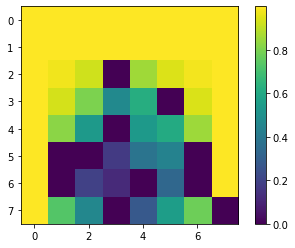

In [25]:
# plot final state value function
v_final_rs  = v_final.reshape(8,8)
plt.figure()
plt.imshow(v_final_rs)
plt.colorbar()

### Value Iteration
*Merge truncated policy evaluation and policy improvement in a single step*

$$ V_{k+1}(s) = max_{a}\sum_{s',r}p(s',r/s,a) [r + \gamma V_{k}(s')]$$

Value iteraion improves its policy by bootstrapping on value function, hence the name `value iteration`

In [26]:
def value_iteration(mdp, gamma=1.0, maxcount=100, tol=1e-9):
    num_states = len(mdp.keys())    
    v = np.zeros(num_states)    
    counter = 0
    while True:
        counter += 1
        qval = np.zeros((num_states, nA))
        v_old = v
        for s in range(num_states): # for every state        
            for action, values in mdp[s].items():
                for prob, next_state, reward, done in values:
                    qval[s, action] += prob * (reward + gamma * v[next_state] * (not done))
        # update state values
        v = np.max(qval, axis=1)
        # check for exit criteria
        if np.amax(np.abs(v-v_old)) <= tol:
            print(f"tol achieved in {counter} steps, exiting...")
            break
        elif counter >= maxcount:
            print(f"Maxcount reached, exiting...")
            break
    # update policy
    pi = {s: a for s, a in enumerate(np.argmax(qval, axis=1))}
    
    return pi,v

In [27]:
pi_vi_new, v_final_vi = value_iteration(mdp, gamma=1.0, maxcount=100, tol=1e-9)

Maxcount reached, exiting...


In [28]:
print_policy(pi, mdp, title='Initial Policy:')

Initial Policy:
| 00      > | 01      ^ | 02      < | 03      < | 04      < | 05      v | 06      > | 07      < |
| 08      v | 09      > | 10      ^ | 11      > | 12      > | 13      ^ | 14      v | 15      < |
| 16      < | 17      < | 18      ^ |           | 20      < | 21      > | 22      > | 23      < |
| 24      < | 25      ^ | 26      < | 27      v | 28      > |           | 30      < | 31      ^ |
| 32      v | 33      ^ | 34      < |           | 36      v | 37      v | 38      v | 39      ^ |
| 40      < |           |           | 43      v | 44      v | 45      > |           | 47      < |
| 48      < |           | 50      > | 51      v |           | 53      ^ |           | 55      < |
| 56      < | 57      < | 58      ^ |           | 60      v | 61      > | 62      v |           |


In [29]:
print_policy(pi_vi_new, mdp, title='Initial Policy:')

Initial Policy:
| 00      ^ | 01      > | 02      > | 03      > | 04      > | 05      > | 06      > | 07      > |
| 08      ^ | 09      ^ | 10      ^ | 11      ^ | 12      ^ | 13      ^ | 14      > | 15      v |
| 16      ^ | 17      ^ | 18      < |           | 20      > | 21      ^ | 22      > | 23      > |
| 24      ^ | 25      ^ | 26      < | 27      v | 28      < |           | 30      > | 31      > |
| 32      ^ | 33      ^ | 34      < |           | 36      > | 37      v | 38      ^ | 39      > |
| 40      < |           |           | 43      v | 44      ^ | 45      < |           | 47      > |
| 48      < |           | 50      v | 51      < |           | 53      < |           | 55      > |
| 56      < | 57      v | 58      < |           | 60      v | 61      > | 62      v |           |


In [30]:
mean_rew_init_policy = mean_rewards(pi, num_episodes=1000, env=env)
mean_rew_conv_policy = mean_rewards(pi_vi_new, num_episodes=1000, env=env)

ep:0, reward:0.0
ep:1, reward:0.0
ep:2, reward:0.0
ep:3, reward:0.0
ep:4, reward:0.0
ep:5, reward:0.0
ep:6, reward:0.0
ep:7, reward:0.0
ep:8, reward:0.0
ep:9, reward:0.0
ep:10, reward:0.0
ep:11, reward:0.0
ep:12, reward:0.0
ep:13, reward:0.0
ep:14, reward:0.0
ep:15, reward:0.0
ep:16, reward:0.0
ep:17, reward:0.0
ep:18, reward:0.0
ep:19, reward:0.0
ep:20, reward:0.0
ep:21, reward:0.0
ep:22, reward:0.0
ep:23, reward:0.0
ep:24, reward:0.0
ep:25, reward:0.0
ep:26, reward:0.0
ep:27, reward:0.0
ep:28, reward:0.0
ep:29, reward:0.0
ep:30, reward:0.0
ep:31, reward:0.0
ep:32, reward:0.0
ep:33, reward:0.0
ep:34, reward:0.0
ep:35, reward:0.0
ep:36, reward:0.0
ep:37, reward:0.0
ep:38, reward:0.0
ep:39, reward:0.0
ep:40, reward:0.0
ep:41, reward:0.0
ep:42, reward:0.0
ep:43, reward:0.0
ep:44, reward:0.0
ep:45, reward:0.0
ep:46, reward:0.0
ep:47, reward:0.0
ep:48, reward:0.0
ep:49, reward:0.0
ep:50, reward:0.0
ep:51, reward:0.0
ep:52, reward:0.0
ep:53, reward:0.0
ep:54, reward:0.0
ep:55, reward:0.0
ep

ep:566, reward:0.0
ep:567, reward:0.0
ep:568, reward:0.0
ep:569, reward:0.0
ep:570, reward:0.0
ep:571, reward:0.0
ep:572, reward:0.0
ep:573, reward:0.0
ep:574, reward:0.0
ep:575, reward:0.0
ep:576, reward:0.0
ep:577, reward:0.0
ep:578, reward:0.0
ep:579, reward:0.0
ep:580, reward:0.0
ep:581, reward:0.0
ep:582, reward:0.0
ep:583, reward:0.0
ep:584, reward:0.0
ep:585, reward:0.0
ep:586, reward:0.0
ep:587, reward:0.0
ep:588, reward:0.0
ep:589, reward:0.0
ep:590, reward:0.0
ep:591, reward:0.0
ep:592, reward:0.0
ep:593, reward:0.0
ep:594, reward:0.0
ep:595, reward:0.0
ep:596, reward:0.0
ep:597, reward:0.0
ep:598, reward:0.0
ep:599, reward:0.0
ep:600, reward:0.0
ep:601, reward:0.0
ep:602, reward:0.0
ep:603, reward:0.0
ep:604, reward:0.0
ep:605, reward:0.0
ep:606, reward:0.0
ep:607, reward:0.0
ep:608, reward:0.0
ep:609, reward:0.0
ep:610, reward:0.0
ep:611, reward:0.0
ep:612, reward:0.0
ep:613, reward:0.0
ep:614, reward:0.0
ep:615, reward:0.0
ep:616, reward:0.0
ep:617, reward:0.0
ep:618, rewa

ep:64, reward:1.0
ep:65, reward:1.0
ep:66, reward:0.0
ep:67, reward:1.0
ep:68, reward:1.0
ep:69, reward:1.0
ep:70, reward:1.0
ep:71, reward:1.0
ep:72, reward:0.0
ep:73, reward:1.0
ep:74, reward:1.0
ep:75, reward:1.0
ep:76, reward:1.0
ep:77, reward:1.0
ep:78, reward:0.0
ep:79, reward:1.0
ep:80, reward:1.0
ep:81, reward:1.0
ep:82, reward:1.0
ep:83, reward:1.0
ep:84, reward:0.0
ep:85, reward:1.0
ep:86, reward:1.0
ep:87, reward:0.0
ep:88, reward:1.0
ep:89, reward:0.0
ep:90, reward:1.0
ep:91, reward:1.0
ep:92, reward:1.0
ep:93, reward:1.0
ep:94, reward:1.0
ep:95, reward:0.0
ep:96, reward:1.0
ep:97, reward:1.0
ep:98, reward:1.0
ep:99, reward:0.0
ep:100, reward:1.0
ep:101, reward:1.0
ep:102, reward:1.0
ep:103, reward:1.0
ep:104, reward:1.0
ep:105, reward:0.0
ep:106, reward:1.0
ep:107, reward:1.0
ep:108, reward:0.0
ep:109, reward:0.0
ep:110, reward:1.0
ep:111, reward:1.0
ep:112, reward:1.0
ep:113, reward:1.0
ep:114, reward:1.0
ep:115, reward:1.0
ep:116, reward:0.0
ep:117, reward:1.0
ep:118, re

ep:546, reward:1.0
ep:547, reward:1.0
ep:548, reward:1.0
ep:549, reward:1.0
ep:550, reward:1.0
ep:551, reward:1.0
ep:552, reward:1.0
ep:553, reward:0.0
ep:554, reward:1.0
ep:555, reward:0.0
ep:556, reward:1.0
ep:557, reward:1.0
ep:558, reward:1.0
ep:559, reward:1.0
ep:560, reward:1.0
ep:561, reward:1.0
ep:562, reward:0.0
ep:563, reward:1.0
ep:564, reward:1.0
ep:565, reward:1.0
ep:566, reward:1.0
ep:567, reward:1.0
ep:568, reward:1.0
ep:569, reward:1.0
ep:570, reward:1.0
ep:571, reward:1.0
ep:572, reward:1.0
ep:573, reward:1.0
ep:574, reward:0.0
ep:575, reward:1.0
ep:576, reward:1.0
ep:577, reward:1.0
ep:578, reward:1.0
ep:579, reward:1.0
ep:580, reward:1.0
ep:581, reward:1.0
ep:582, reward:1.0
ep:583, reward:1.0
ep:584, reward:1.0
ep:585, reward:1.0
ep:586, reward:1.0
ep:587, reward:0.0
ep:588, reward:0.0
ep:589, reward:1.0
ep:590, reward:1.0
ep:591, reward:1.0
ep:592, reward:1.0
ep:593, reward:1.0
ep:594, reward:1.0
ep:595, reward:1.0
ep:596, reward:1.0
ep:597, reward:1.0
ep:598, rewa

In [31]:
mean_rew_init_policy, mean_rew_conv_policy

(0.0, 0.899)

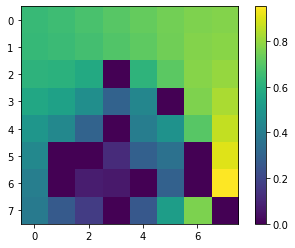

In [32]:
# plot the converged value function from value iteration
plt.figure()
plt.imshow(v_final_vi.reshape(8,8))
plt.colorbar()

**__Conclusions__**
- We have implemented PI and VI on 8x8 Frozen Lake where env is stochastic
- For both cases, we finally converged to optimal policy 
- Optimal policy gives around 90% of success rate in this environment

In [33]:
pi_vi_new

{0: 3,
 1: 2,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 3,
 9: 3,
 10: 3,
 11: 3,
 12: 3,
 13: 3,
 14: 2,
 15: 1,
 16: 3,
 17: 3,
 18: 0,
 19: 0,
 20: 2,
 21: 3,
 22: 2,
 23: 2,
 24: 3,
 25: 3,
 26: 0,
 27: 1,
 28: 0,
 29: 0,
 30: 2,
 31: 2,
 32: 3,
 33: 3,
 34: 0,
 35: 0,
 36: 2,
 37: 1,
 38: 3,
 39: 2,
 40: 0,
 41: 0,
 42: 0,
 43: 1,
 44: 3,
 45: 0,
 46: 0,
 47: 2,
 48: 0,
 49: 0,
 50: 1,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 2,
 56: 0,
 57: 1,
 58: 0,
 59: 0,
 60: 1,
 61: 2,
 62: 1,
 63: 0}